In [1]:
import numpy as np
import pandas as pd 
import datetime as datetime
import gym
from gym import envs

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam    

import os
import time

import matplotlib.pyplot as plt

import random 
from collections import deque

envs.registry.all()
env = gym.make('CartPole-v0')




In [2]:
class Agent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        
        #experience replay
        self.memory = deque(maxlen = 20000)
        
        #discount rate
        self.gamma = 0.95
        
        #epsilon-greedy params
        self.epsilon = 1.0
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.1
        
        self.learning_rate = 0.001
        
        self.model = self._build_model()
        self.target = self._build_model()
        self.alighn_target_model()
    
    def set_test_mode(self,value,gamma = 0.95):
    
        if value:
            self.gamma = 0
        else:
            self.gamma = gamma
            
    
    def _build_model(self):
          
        model = Sequential()
        
        #hyper params to tune
        model.add(Dense(64, input_dim = self.state_size, activation = 'relu'))
        model.add(Dense(64, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        
        model.compile(loss = 'mse', optimizer = Adam(learning_rate = self.learning_rate))
        
        return model
    
    def alighn_target_model(self):
        self.target.set_weights(self.model.get_weights())
    
    def remember(self, state, action,reward,next_state,done):
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        #epsilon-greedy choice of the action to perform
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size):  
        
        states = np.ndarray((0,4))
        next_states = np.ndarray((0,4))
        actions = []
        rewards =[]
        terminateds = []

        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, terminated in minibatch:     
            states = np.vstack((states, state))
            next_states = np.vstack((next_states, next_state))
            actions.append(action)
            rewards.append(reward)
            terminateds.append(terminated)
        
        pred_Q = self.model.predict(states) #predicted q-values
        target_Q = self.target.predict(next_states)
        
        for i in range(len(pred_Q)):         
            if terminateds[i]:
                pred_Q[i,int(actions[i])] = rewards[i]
            else:
                pred_Q[i,int(actions[i])] = rewards[i] + self.gamma * np.amax(target_Q[i])
                
                
        self.model.fit(states, pred_Q, epochs =1, verbose = 0)        
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        
    def load(self, path):
        self.model.load_weights(path)
        
    def save(self, path):
        self.model.save_weights(path)

episode : 0/1000, score : 19, e : 1.0
score mean over 100 episode :  19.0
episode : 1/1000, score : 17, e : 1.0
score mean over 100 episode :  18.0
episode : 2/1000, score : 22, e : 0.99
score mean over 100 episode :  19.333333333333332
episode : 3/1000, score : 20, e : 0.98
score mean over 100 episode :  19.5
episode : 4/1000, score : 20, e : 0.96
score mean over 100 episode :  19.6
episode : 5/1000, score : 11, e : 0.96
score mean over 100 episode :  18.166666666666668
episode : 6/1000, score : 20, e : 0.94
score mean over 100 episode :  18.428571428571427
episode : 7/1000, score : 19, e : 0.93
score mean over 100 episode :  18.5
episode : 8/1000, score : 13, e : 0.92
score mean over 100 episode :  17.88888888888889
episode : 9/1000, score : 38, e : 0.9
score mean over 100 episode :  19.9
episode : 10/1000, score : 19, e : 0.9
score mean over 100 episode :  19.818181818181817
episode : 11/1000, score : 15, e : 0.89
score mean over 100 episode :  19.416666666666668
episode : 12/1000, 

episode : 101/1000, score : 12, e : 0.39
score mean over 100 episode :  11.8
episode : 102/1000, score : 9, e : 0.39
score mean over 100 episode :  11.76
episode : 103/1000, score : 9, e : 0.38
score mean over 100 episode :  11.74
episode : 104/1000, score : 9, e : 0.38
score mean over 100 episode :  11.68
episode : 105/1000, score : 12, e : 0.38
score mean over 100 episode :  11.76
episode : 106/1000, score : 9, e : 0.38
score mean over 100 episode :  11.74
episode : 107/1000, score : 11, e : 0.38
score mean over 100 episode :  11.58
episode : 108/1000, score : 13, e : 0.37
score mean over 100 episode :  11.66
episode : 109/1000, score : 9, e : 0.37
score mean over 100 episode :  11.56
episode : 110/1000, score : 9, e : 0.37
score mean over 100 episode :  11.42
episode : 111/1000, score : 15, e : 0.37
score mean over 100 episode :  11.4
episode : 112/1000, score : 11, e : 0.36
score mean over 100 episode :  11.42
episode : 113/1000, score : 10, e : 0.36
score mean over 100 episode :  

episode : 207/1000, score : 11, e : 0.2
score mean over 100 episode :  10.12
episode : 208/1000, score : 9, e : 0.2
score mean over 100 episode :  10.12
episode : 209/1000, score : 10, e : 0.19
score mean over 100 episode :  10.14
episode : 210/1000, score : 12, e : 0.19
score mean over 100 episode :  10.18
episode : 211/1000, score : 11, e : 0.19
score mean over 100 episode :  10.2
episode : 212/1000, score : 9, e : 0.19
score mean over 100 episode :  10.16
episode : 213/1000, score : 11, e : 0.19
score mean over 100 episode :  10.18
episode : 214/1000, score : 9, e : 0.19
score mean over 100 episode :  10.18
episode : 215/1000, score : 9, e : 0.19
score mean over 100 episode :  10.16
episode : 216/1000, score : 9, e : 0.19
score mean over 100 episode :  10.16
episode : 217/1000, score : 9, e : 0.18
score mean over 100 episode :  10.16
episode : 218/1000, score : 9, e : 0.18
score mean over 100 episode :  10.14
episode : 219/1000, score : 9, e : 0.18
score mean over 100 episode :  10.

episode : 313/1000, score : 14, e : 0.094
score mean over 100 episode :  11.62
episode : 314/1000, score : 10, e : 0.093
score mean over 100 episode :  11.2
episode : 315/1000, score : 11, e : 0.093
score mean over 100 episode :  11.2
episode : 316/1000, score : 10, e : 0.092
score mean over 100 episode :  11.22
episode : 317/1000, score : 12, e : 0.091
score mean over 100 episode :  11.26
episode : 318/1000, score : 12, e : 0.091
score mean over 100 episode :  11.32
episode : 319/1000, score : 12, e : 0.091
score mean over 100 episode :  11.36
episode : 320/1000, score : 11, e : 0.09
score mean over 100 episode :  11.42
episode : 321/1000, score : 13, e : 0.089
score mean over 100 episode :  11.5
episode : 322/1000, score : 11, e : 0.089
score mean over 100 episode :  11.54
episode : 323/1000, score : 14, e : 0.088
score mean over 100 episode :  11.66
episode : 324/1000, score : 11, e : 0.087
score mean over 100 episode :  11.72
episode : 325/1000, score : 11, e : 0.086
score mean ove

episode : 417/1000, score : 16, e : 0.04
score mean over 100 episode :  13.88
episode : 418/1000, score : 13, e : 0.04
score mean over 100 episode :  13.9
episode : 419/1000, score : 11, e : 0.039
score mean over 100 episode :  13.88
episode : 420/1000, score : 15, e : 0.039
score mean over 100 episode :  13.94
episode : 421/1000, score : 13, e : 0.039
score mean over 100 episode :  13.92
episode : 422/1000, score : 13, e : 0.039
score mean over 100 episode :  13.9
episode : 423/1000, score : 12, e : 0.038
score mean over 100 episode :  13.92
episode : 424/1000, score : 15, e : 0.038
score mean over 100 episode :  13.98
episode : 425/1000, score : 13, e : 0.037
score mean over 100 episode :  13.94
episode : 426/1000, score : 16, e : 0.037
score mean over 100 episode :  14.02
episode : 427/1000, score : 12, e : 0.037
score mean over 100 episode :  13.94
episode : 428/1000, score : 13, e : 0.037
score mean over 100 episode :  13.96
episode : 429/1000, score : 12, e : 0.036
score mean ove

episode : 521/1000, score : 123, e : 0.0099
score mean over 100 episode :  41.3
episode : 522/1000, score : 61, e : 0.0099
score mean over 100 episode :  41.88
episode : 523/1000, score : 39, e : 0.0099
score mean over 100 episode :  42.32
episode : 524/1000, score : 36, e : 0.0099
score mean over 100 episode :  42.58
episode : 525/1000, score : 46, e : 0.0099
score mean over 100 episode :  43.04
episode : 526/1000, score : 43, e : 0.0099
score mean over 100 episode :  43.5
episode : 527/1000, score : 72, e : 0.0099
score mean over 100 episode :  44.52
episode : 528/1000, score : 29, e : 0.0099
score mean over 100 episode :  44.46
episode : 529/1000, score : 32, e : 0.0099
score mean over 100 episode :  44.3
episode : 530/1000, score : 35, e : 0.0099
score mean over 100 episode :  44.5
episode : 531/1000, score : 21, e : 0.0099
score mean over 100 episode :  44.42
episode : 532/1000, score : 44, e : 0.0099
score mean over 100 episode :  44.62
episode : 533/1000, score : 70, e : 0.0099


episode : 624/1000, score : 31, e : 0.0099
score mean over 100 episode :  50.32
episode : 625/1000, score : 21, e : 0.0099
score mean over 100 episode :  49.9
episode : 626/1000, score : 19, e : 0.0099
score mean over 100 episode :  49.68
episode : 627/1000, score : 20, e : 0.0099
score mean over 100 episode :  48.86
episode : 628/1000, score : 33, e : 0.0099
score mean over 100 episode :  48.16
episode : 629/1000, score : 26, e : 0.0099
score mean over 100 episode :  47.76
episode : 630/1000, score : 145, e : 0.0099
score mean over 100 episode :  50.02
episode : 631/1000, score : 28, e : 0.0099
score mean over 100 episode :  49.84
episode : 632/1000, score : 32, e : 0.0099
score mean over 100 episode :  49.18
episode : 633/1000, score : 31, e : 0.0099
score mean over 100 episode :  47.66
episode : 634/1000, score : 29, e : 0.0099
score mean over 100 episode :  46.86
episode : 635/1000, score : 52, e : 0.0099
score mean over 100 episode :  46.66
episode : 636/1000, score : 69, e : 0.00

episode : 727/1000, score : 51, e : 0.0099
score mean over 100 episode :  42.84
episode : 728/1000, score : 48, e : 0.0099
score mean over 100 episode :  43.02
episode : 729/1000, score : 36, e : 0.0099
score mean over 100 episode :  41.52
episode : 730/1000, score : 34, e : 0.0099
score mean over 100 episode :  41.5
episode : 731/1000, score : 53, e : 0.0099
score mean over 100 episode :  41.98
episode : 732/1000, score : 74, e : 0.0099
score mean over 100 episode :  42.9
episode : 733/1000, score : 67, e : 0.0099
score mean over 100 episode :  43.56
episode : 734/1000, score : 85, e : 0.0099
score mean over 100 episode :  44.62
episode : 735/1000, score : 69, e : 0.0099
score mean over 100 episode :  45.22
episode : 736/1000, score : 59, e : 0.0099
score mean over 100 episode :  45.18
episode : 737/1000, score : 126, e : 0.0099
score mean over 100 episode :  46.52
episode : 738/1000, score : 51, e : 0.0099
score mean over 100 episode :  46.98
episode : 739/1000, score : 194, e : 0.00

episode : 829/1000, score : 219, e : 0.0099
score mean over 100 episode :  140.94
episode : 830/1000, score : 135, e : 0.0099
score mean over 100 episode :  139.36
episode : 831/1000, score : 172, e : 0.0099
score mean over 100 episode :  141.92
episode : 832/1000, score : 184, e : 0.0099
score mean over 100 episode :  144.36
episode : 833/1000, score : 183, e : 0.0099
score mean over 100 episode :  146.04
episode : 834/1000, score : 194, e : 0.0099
score mean over 100 episode :  146.52
episode : 835/1000, score : 158, e : 0.0099
score mean over 100 episode :  148.1
episode : 836/1000, score : 219, e : 0.0099
score mean over 100 episode :  149.84
episode : 837/1000, score : 206, e : 0.0099
score mean over 100 episode :  151.0
episode : 838/1000, score : 138, e : 0.0099
score mean over 100 episode :  150.1
episode : 839/1000, score : 458, e : 0.0099
score mean over 100 episode :  156.94
episode : 840/1000, score : 112, e : 0.0099
score mean over 100 episode :  156.88
episode : 841/1000,

episode : 930/1000, score : 174, e : 0.0099
score mean over 100 episode :  207.66
episode : 931/1000, score : 210, e : 0.0099
score mean over 100 episode :  207.96
episode : 932/1000, score : 232, e : 0.0099
score mean over 100 episode :  209.02
episode : 933/1000, score : 192, e : 0.0099
score mean over 100 episode :  209.66
episode : 934/1000, score : 195, e : 0.0099
score mean over 100 episode :  209.92
episode : 935/1000, score : 165, e : 0.0099
score mean over 100 episode :  209.38
episode : 936/1000, score : 220, e : 0.0099
score mean over 100 episode :  209.54
episode : 937/1000, score : 380, e : 0.0099
score mean over 100 episode :  213.68
episode : 938/1000, score : 216, e : 0.0099
score mean over 100 episode :  213.86
episode : 939/1000, score : 156, e : 0.0099
score mean over 100 episode :  212.34
episode : 940/1000, score : 258, e : 0.0099
score mean over 100 episode :  213.72
episode : 941/1000, score : 173, e : 0.0099
score mean over 100 episode :  212.32
episode : 942/10

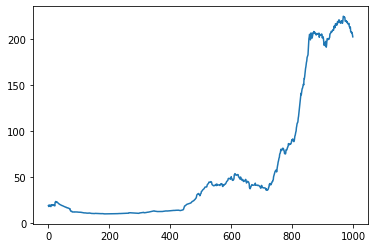

In [3]:
#sort of main, to define as a class "controller"



env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
batch_size = 32

n_episode = 1000
UPDATE_FREQ = 16
NETW_UPDATE_FREQ = 100
loop_number = 0

output_dir = 'model_output/cartepole'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

agent = Agent(state_size, action_size)

score_mean = deque(maxlen = 50)
to_plot = []
for e in range(n_episode):
    
    state = env.reset()
    state = np.reshape(state, [1,state_size])
    done = False
    score = 0
    
    while not done:
        #env.render()
        score+=1
        action = agent.act(state)
        
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1,state_size])
        
        agent.remember(state, action, reward, next_state, done)
        
        state = next_state
        
        if loop_number % UPDATE_FREQ == 0 and loop_number > batch_size:
            agent.replay(batch_size)
            pass
            
        if loop_number % NETW_UPDATE_FREQ == 0:
            
            agent.alighn_target_model()
            
        loop_number += 1
        if done:
            print("episode : {}/{}, score : {}, e : {:.2}".format(e, n_episode, score, agent.epsilon))
            score_mean.append(score)
            break
        
    if e%50 == 0:
        #agent.save(output_dir + "weights_" + '{:04d}'.format(e) + ".hdf5")
        pass
    print("score mean over 100 episode : " ,np.mean(score_mean))
    to_plot.append(np.mean(score_mean))
    if (np.mean(score_mean) > 470):
        print("trained after ", e, " episodes")
        break
plt.plot(to_plot)
env.close()

        

In [6]:
# Evaluate for 100 episodes

agent.set_test_mode(True)

sum_rewards = 0.0
nbr_episode = 10
for _ in range(nbr_episode):
    state = env.reset()
    state = np.reshape(state, [1,state_size])
    done = False
    while not done:
        env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1,state_size])
        sum_rewards += reward
        
        state = next_state
    print(sum_rewards)
print('Mean evaluation return:', sum_rewards / nbr_episode)

# Close agent and environment

env.close()

177.0
400.0
631.0
1010.0
1354.0
1540.0
1748.0
1953.0
2203.0
2377.0
Mean evaluation return: 237.7


In [5]:
state = np.array([[1,1,1,1]])
env.close()

states = np.ndarray((0,4))
next_states = np.ndarray((0,4))
pred_Q = np.ndarray((0,2))
target_Q = np.ndarray((0,2))

actions = np.ndarray((0,1))
rewards = np.ndarray((0,1))

states = np.vstack((states, state))
states = np.vstack((states, state))
states = np.vstack((states, state))

next_states = np.vstack((next_states,state))
next_states = np.vstack((next_states,state))
next_states = np.vstack((next_states,state))

actions = np.vstack((actions,np.array([[0]])))
actions = np.vstack((actions,np.array([[1]])))
actions = np.vstack((actions,np.array([[0]])))

rewards = np.vstack((rewards,np.array([[1]])))
rewards = np.vstack((rewards,np.array([[1]])))
rewards = np.vstack((rewards,np.array([[1]])))

pred_Q = np.vstack((pred_Q,np.array([[0.3,0.5]])))
pred_Q = np.vstack((pred_Q,np.array([[0.3,0.5]])))
pred_Q = np.vstack((pred_Q,np.array([[0.3,0.5]])))

target_Q = np.vstack((target_Q,np.array([[0,2]])))
target_Q = np.vstack((target_Q,np.array([[1,0]])))
target_Q = np.vstack((target_Q,np.array([[1,3]])))


print(states,"\n")
print(next_states,"\n")
print(actions,"\n")
print(rewards,"\n")
print(pred_Q[i,int(actions[i,0])])



for i in range(len(pred_Q)):
    pred_Q[i,int(actions[i,0])] = rewards[i,0] + 0.9 * np.amax(target_Q[i])
print("test : \n" ,pred_Q) 


nbrJob

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[[0.]
 [1.]
 [0.]] 

[[1.]
 [1.]
 [1.]] 



NameError: name 'i' is not defined

In [ ]:
nbr_job = 4
nbr_operation = 3
nbr_params = 2




state_status = np.full((nbr_job,nbr_operation),0)
state_proc_time = np.full((nbr_job,nbr_operation),1)
state_exp_time = np.full((nbr_job,nbr_operation),2)
state_exectuable = np.full((nbr_job,nbr_operation),3)

state = np.stack([state_status,state_proc_time,state_exp_time,state_exectuable],axis = 2)

print(state)
print(state.shape)

print(state[0,0,3])


In [ ]:
test = np.zeros(4)
print(test)

test[:] = 3,4,5,6
print(test)